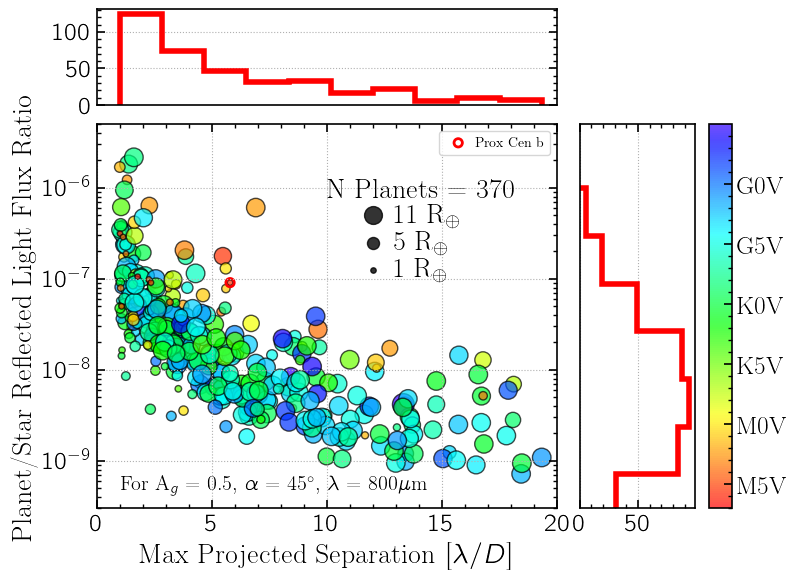

In [1]:
from myastrotools.tools import ComputeFluxRatio, MakeSeparationContrastPlotOfNearbyRVPlanets

pl = pd.read_csv('GMagAO-X-target-list.csv')
pl_lessthan20lod = pl.loc[np.where(pl['Sep lod']<20)[0]]
pl_lessthan20lod = pl_lessthan20lod.reset_index(drop=True)
fig, C = MakeSeparationContrastPlotOfNearbyRVPlanets(pl_lessthan20lod, alpha = 45, Ag = 0.5, plot_proxcen = True)

In [2]:
pl.columns

Index(['loc_rowid', 'pl_name', 'hostname', 'hd_name', 'hip_name', 'gaia_id',
       'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod',
       ...
       'Mam Inferred Teff from SpT', 'Sep arcsec', 'Sep lod', 'Re', 'SpT',
       'StarTeff', 'Mam Inferred StarRad from Teff', 'StarRad', 'Teq',
       'Giant'],
      dtype='object', length=159)

In [3]:
pl['SpT']

0      4.722567
1      4.387715
2      6.211050
3      3.600000
4      4.000000
         ...   
539    4.369942
540    4.374341
541    3.800000
542    4.125273
543    4.900000
Name: SpT, Length: 544, dtype: float64

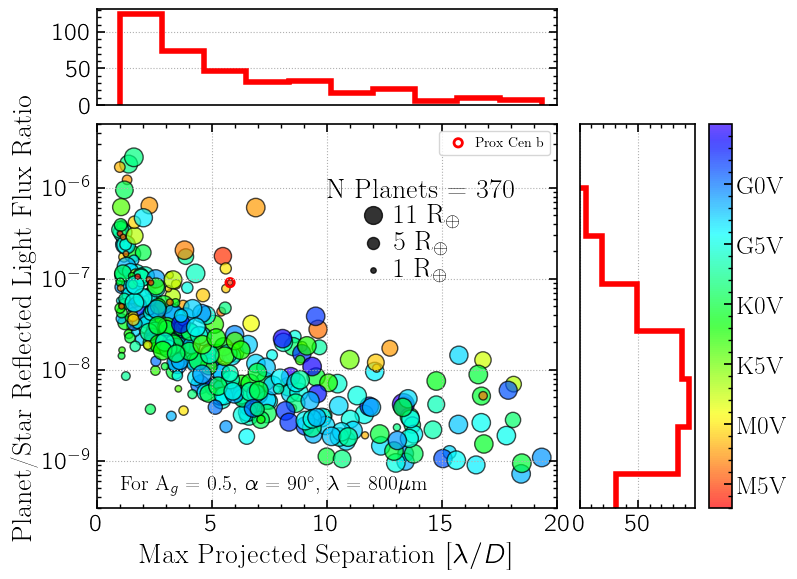

In [4]:
pl = pd.read_csv('GMagAO-X-target-list.csv')
pl_lessthan20lod = pl.loc[np.where(pl['Sep lod']<20)[0]]
pl_lessthan20lod = pl_lessthan20lod.reset_index(drop=True)
plot_proxcen=True
alpha = 90
Ag = 0.5

from myastrotools.tools import ComputeFluxRatio
C = []   
for i in range(len(pl_lessthan20lod)):
    if not np.isnan(pl_lessthan20lod.loc[i]['pl_rade']):
        R = pl_lessthan20lod.loc[i]['pl_rade']
    elif not np.isnan(pl_lessthan20lod['M2R infered radius [Rearth]'][i]):
        R = pl_lessthan20lod['M2R infered radius [Rearth]'][i]
    else:
        pass
    sep = pl_lessthan20lod.loc[i]['pl_orbsmax']
    CC = ComputeFluxRatio(R*u.Rearth, sep*u.au, np.radians(alpha), Ag = 0.5)
    C.append(CC)

C = np.array(C)

rad = pl_lessthan20lod['pl_rade'].copy()
rad.loc[np.where(np.isnan(rad))[0]] = pl_lessthan20lod['M2R infered radius [Rearth]'][np.where(np.isnan(rad))[0]]

spt = pl_lessthan20lod['SpT Number'].copy()
spt.loc[np.where(np.isnan(spt))[0]] = pl_lessthan20lod['Mam Inferred SpT from Teff'][np.where(np.isnan(spt))[0]]

import matplotlib as mpl

ticks = np.arange(4.0,7.0,0.5)
ticklabels = ['G0V','G5V','K0V','K5V','M0V','M5V']

plotx, ploty = pl_lessthan20lod['Sep lod'],C
colorby = spt

#%matplotlib notebook
fig = plt.figure()

ax = fig.add_gridspec(top=0.75, right=0.7).subplots()


norm = mpl.colors.Normalize(vmin=2.2, vmax=np.max(spt))
a = ax.scatter(plotx, ploty, 
            c=colorby, cmap='hsv_r', s=rad*15, alpha =0.7, norm=norm, edgecolor='black')
if plot_proxcen:
    ProxCenInd = np.where(pl_lessthan20lod['hostname'] == 'Proxima Cen')[0][0]
    ax.scatter(pl_lessthan20lod['Sep lod'][ProxCenInd], C[ProxCenInd],
      edgecolors = 'red', lw=2, color='None', label='Prox Cen b')
    ax.legend(fontsize=10)

x,y = 12,5e-7
ax.scatter(x,y, s = 11*15, color='black', alpha = 0.8)
ax.annotate(r'11 R$_\oplus$', xy = (x,y), xytext = (15,-5), textcoords='offset points',fontsize=20)
x,y = 12,2.5e-7
ax.scatter(x,y, s = 5*15, color='black', alpha = 0.8)
ax.annotate(r'5 R$_\oplus$', xy = (x,y), xytext = (15,-5), textcoords='offset points',fontsize=20)
x,y = 12,1.25e-7
ax.scatter(x,y, s = 1*15, color='black', alpha = 0.8)
ax.annotate(r'1 R$_\oplus$', xy = (x,y), xytext = (15,-5), textcoords='offset points',fontsize=20)

ax.annotate('N Planets = {}'.format(len(pl_lessthan20lod)),
             xy = (0.5,0.81),xycoords='axes fraction', fontsize=20)

ax.annotate(r' For A$_g$ = '+str(Ag)+r', $\alpha$ = '+str(alpha)+r'$^\circ$, $\lambda$ = 800$\mu$m', 
            xy = (0.05,0.05), xycoords = ('axes fraction'),
           fontsize=15)


ax.set_yscale('log')
ax.set_xlim(0,20)
ax.set_ylim(bottom=3e-10, top=5e-6)
ax.set_xlabel(r'Max Projected Separation [$\lambda/D$]')
ax.set_ylabel('Planet/Star Reflected Light Flux Ratio')
ax.grid(ls=':')


ax1 = ax.inset_axes([0,1.05,1,0.25])#, sharex=ax)
ax1.hist(plotx, histtype='step',lw=4, color='red')
ax1.set_xlim(0,20)
ax1.set_yticks([0,50,100])
ax1.set_xticks([])
ax1.grid(ls=':')

ax2 = ax.inset_axes([1.05,0,0.25,1])
ax2.hist(np.log10(ploty), bins=7,
         histtype='step',lw=4, color='red',orientation="horizontal")
ax2.set_ylim(bottom=-9, top=-5)
ax2.set_yticks([])
ax2.grid(ls=':')

cbarax = ax.inset_axes([1.33,0,0.05,1])
fig.colorbar(a, cax=cbarax, orientation="vertical", ticks=ticks)
cbarax.set_yticklabels(ticklabels)
cbarax.set_ylim(np.min(spt),np.max(spt))
cbarax.invert_yaxis()



In [5]:
plotx, ploty = np.array(pl_lessthan20lod['Sep lod']),C
multiplier = 2
datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                           'name':pl_lessthan20lod['pl_name'], 'rad':rad, 'spt':spt
                           })

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker
from bokeh.palettes import Magma256, Turbo256
from bokeh.transform import linear_cmap
output_notebook()


data=ColumnDataSource(data=datadf)


mapper = linear_cmap(field_name='color', 
                     #palette=Magma256,
                     palette=Turbo256[::-1],
                     low=min(spt), high=max(spt),
                    low_color=Turbo256[::-1][150], high_color=Turbo256[::-1][200])
tools = "hover, zoom_in, zoom_out, save, undo, redo, pan"
tooltips = [
    ('Planet', '@name'),
    #("(x,y)", "($x, $y)"),
    ('Cont', '@ploty'),
    ('Sep', '@plotx{0.00}'),
    ('Rad','@rad{0.00}'),
    ('SpT','@spt{0.0}')
]
        
p = figure(width=1000, height=850, y_axis_type="log", tools=tools, tooltips=tooltips, toolbar_location="above")


p.circle('plotx','ploty', source=data, fill_alpha=0.6, size='markersize', 
         line_color=mapper, color=mapper)


color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                     location=(0,0), title="Spectral Type",
                    title_text_font_size = '20pt',
                     major_label_text_font_size = '15pt')

ticks = np.arange(4.0,7.0,0.5)
color_bar.ticker=FixedTicker(ticks=ticks)
color_bar.major_label_overrides = {6.5: 'G0V', 6:'G5V', 5.5:'K0V',5:'K5V',4.5:'M0V',4:'M5V'}
p.add_layout(color_bar, 'right')


label = Label(
    text=r'$$\mathrm{For}\; A_g = '+str(Ag)+r', \alpha = '+str(alpha)+r'^\circ, \lambda = 800\mu m\$$',
    #text='yes',
    x=50, y=20,
    x_units="screen", y_units="screen",text_font_size = '20pt'
)
p.add_layout(label)

x,y = 16,1.5e-6
p.circle(x,y, fill_alpha=0.6, size=11*multiplier, 
         color='black')
label1 = Label(x=x, y=y, text=r'$$11 R_\oplus$$',
                   x_offset=20, y_offset=-20,
                   text_font_size = '20pt')
p.add_layout(label1)

x,y = 16,8.5e-7
p.circle(x,y, fill_alpha=0.6, size=5*multiplier, 
         color='black')
label2 = Label(x=x, y=y, text=r'$$5 R_\oplus$$',
                  x_offset=20, y_offset=-20,text_font_size = '20pt')
p.add_layout(label2)
x,y = 16,5e-7
p.circle(x,y, fill_alpha=0.6, size=1*multiplier, 
         color='black')
label3 = Label(x=x, y=y, text=r'$$1 R_\oplus$$',
                  x_offset=20, y_offset=-20,text_font_size = '20pt')
p.add_layout(label3)

p.xaxis.axis_label = r'\[ \mathrm{Max\; Projected\; Separation}\; [\lambda/D]\]'
p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
p.xaxis.axis_label_text_font_size = '20pt'
p.yaxis.axis_label_text_font_size = '20pt'
p.yaxis.major_label_text_font_size = "15pt"
p.xaxis.major_label_text_font_size = "15pt"


show(p)

Loading BokehJS ...

In [6]:
def MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(pl, alpha = 45, Ag = 0.5, saveplot = True,
                                                          output_file_name = 'RVPlanetContrastPlot'):
    from myastrotools.tools import ComputeFluxRatio
    C = []   
    for i in range(len(pl)):
        if not np.isnan(pl.loc[i]['pl_rade']):
            R = pl.loc[i]['pl_rade']
        elif not np.isnan(pl['M2R infered radius [Rearth]'][i]):
            R = pl['M2R infered radius [Rearth]'][i]
        else:
            pass
        sep = pl.loc[i]['pl_orbsmax']
        CC = ComputeFluxRatio(R*u.Rearth, sep*u.au, np.radians(alpha), Ag = Ag)
        C.append(CC)
    
    C = np.array(C)

    rad = pl['pl_rade'].copy()
    rad.loc[np.where(np.isnan(rad))[0]] = pl['M2R infered radius [Rearth]'][np.where(np.isnan(rad))[0]]

    spt = pl['SpT Number'].copy()
    spt.loc[np.where(np.isnan(spt))[0]] = pl['Mam Inferred SpT from Teff'][np.where(np.isnan(spt))[0]]
    
    plotx, ploty = np.array(pl['Sep lod']),C
    multiplier = 2
    datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                               'name':pl['pl_name'], 'rad':rad, 'spt':spt
                               })

    from bokeh.plotting import figure, show, output_file, save
    from bokeh.io import output_notebook
    from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
    from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker
    from bokeh.palettes import Magma256, Turbo256
    from bokeh.transform import linear_cmap
    output_notebook()


    data=ColumnDataSource(data=datadf)


    mapper = linear_cmap(field_name='color', 
                         #palette=Magma256,
                         palette=Turbo256[::-1],
                         low=min(spt), high=max(spt),
                        low_color=Turbo256[::-1][150], high_color=Turbo256[::-1][200])
    tools = "hover, zoom_in, zoom_out, save, undo, redo, pan"
    tooltips = [
        ('Planet', '@name'),
        #("(x,y)", "($x, $y)"),
        ('Cont', '@ploty'),
        ('Sep', '@plotx{0.00}'),
        ('Rad','@rad{0.00}'),
        ('SpT','@spt{0.0}')
    ]

    p = figure(width=1000, height=850, y_axis_type="log", tools=tools, tooltips=tooltips, toolbar_location="above")


    p.circle('plotx','ploty', source=data, fill_alpha=0.6, size='markersize', 
             line_color=mapper, color=mapper)


    color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                         location=(0,0), title="Spectral Type",
                        title_text_font_size = '20pt',
                         major_label_text_font_size = '15pt')

    ticks = np.arange(4.0,7.0,0.5)
    color_bar.ticker=FixedTicker(ticks=ticks)
    color_bar.major_label_overrides = {6.5: 'G0V', 6:'G5V', 5.5:'K0V',5:'K5V',4.5:'M0V',4:'M5V'}
    p.add_layout(color_bar, 'right')


    label = Label(
        text=r'$$\mathrm{For}\; A_g = '+str(Ag)+r', \alpha = '+str(alpha)+r'^\circ, \lambda = 800\mu m\$$',
        #text='yes',
        x=50, y=20,
        x_units="screen", y_units="screen",text_font_size = '20pt'
    )
    p.add_layout(label)

    x,y = 16,1.5e-6
    p.circle(x,y, fill_alpha=0.6, size=11*multiplier, 
             color='black')
    label1 = Label(x=x, y=y, text=r'$$11 R_\oplus$$',
                       x_offset=20, y_offset=-20,
                       text_font_size = '20pt')
    p.add_layout(label1)

    x,y = 16,8.5e-7
    p.circle(x,y, fill_alpha=0.6, size=5*multiplier, 
             color='black')
    label2 = Label(x=x, y=y, text=r'$$5 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label2)
    x,y = 16,5e-7
    p.circle(x,y, fill_alpha=0.6, size=1*multiplier, 
             color='black')
    label3 = Label(x=x, y=y, text=r'$$1 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label3)

    p.xaxis.axis_label = r'\[ \mathrm{Max\; Projected\; Separation}\; [\lambda/D]\]'
    p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
    p.xaxis.axis_label_text_font_size = '20pt'
    p.yaxis.axis_label_text_font_size = '20pt'
    p.yaxis.major_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = "15pt"
    if saveplot:
        output_file(output_file_name+".html")
        save(p)
    else:
        show(p)

    return p

from bokeh.io import output_notebook
MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(pl_lessthan20lod, alpha = 45, Ag = 0.5, saveplot = False)




Loading BokehJS ...

figure(id='p1280', ...)

In [1]:
from myastrotools.tools import ComputeFluxRatio, MakeSeparationContrastPlotOfNearbyRVPlanets,\
MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets

pl = pd.read_csv('GMagAO-X-target-list.csv')
pl_lessthan20lod = pl.loc[np.where(pl['Sep lod']<20)[0]]
pl_lessthan20lod = pl_lessthan20lod.reset_index(drop=True)
MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(pl_lessthan20lod, alpha = 45, Ag = 0.5, saveplot = True)


Loading BokehJS ...

figure(id='p1005', ...)

In [7]:
def MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, plotx, ploty, saveplot = True, Ag = 0.5,
                                                           filt = 'None', xaxis_label = '',
                                                           annotation_text = '', IWA = 2,
                                                           ytop = 2e-6, ybottom = 2e-10,
                                                          output_file_name = 'RVPlanetContrastPlot'):


    rad = orbits['Re'].copy()
    spt = orbits['SpT Number'].copy()
    
    plotx, ploty = np.array(plotx),np.array(ploty)
    multiplier = 2
    datadf = pd.DataFrame(data={'plotx':plotx, 'ploty':ploty, 'color':spt, 'markersize':rad*multiplier,
                               'name':orbits['pl_name'], 'rad':rad, 'spt':spt, 'dist':orbits['sy_dist']
                               })

    from bokeh.plotting import figure, show, output_file, save
    from bokeh.io import output_notebook
    from bokeh.models import LinearColorMapper, ColumnDataSource, LinearInterpolator
    from bokeh.models import  Range1d, LabelSet, Label, ColorBar, FixedTicker, Span
    from bokeh.palettes import Magma256, Turbo256
    from bokeh.transform import linear_cmap
    output_notebook()


    data=ColumnDataSource(data=datadf)


    mapper = linear_cmap(field_name='color', 
                         #palette=Magma256,
                         palette=Turbo256[::-1],
                         low=min(spt), high=max(spt),
                        low_color=Turbo256[::-1][150], high_color=Turbo256[::-1][200])
    tools = "hover, zoom_in, zoom_out, save, undo, redo, pan"
    tooltips = [
        ('Planet', '@name'),
        #("(x,y)", "($x, $y)"),
        ('Cont', '@ploty'),
        ('Sep [lod]', '@plotx{0.00}'),
        ('Rad [Rearth]','@rad{0.00}'),
        ('SpT','@spt{0.0}'),
        ('Dist [pc]','@dist{0.0}')
    ]

    p = figure(width=1000, height=850, y_axis_type="log", tools=tools, 
               tooltips=tooltips, toolbar_location="above")


    p.circle('plotx','ploty', source=data, fill_alpha=0.6, size='markersize', 
             line_color=mapper, color=mapper)


    color_bar = ColorBar(color_mapper=mapper['transform'], width=15, 
                         location=(0,0), title="Spectral Type",
                        title_text_font_size = '20pt',
                         major_label_text_font_size = '15pt')

    ticks = np.arange(4.0,7.0,0.5)
    color_bar.ticker=FixedTicker(ticks=ticks)
    color_bar.major_label_overrides = {6.5: 'G0V', 6:'G5V', 5.5:'K0V',5:'K5V',4.5:'M0V',4:'M5V'}
    p.add_layout(color_bar, 'right')

    label = Label(
        text= annotation_text,
        #text='yes',
        x=50, y=20,
        x_units="screen", y_units="screen",text_font_size = '20pt'
    )
    p.add_layout(label)
    
    delt = np.log10(ytop) - np.log10(ybottom)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.9*delt))
    p.circle(x,y, fill_alpha=0.6, size=11*multiplier,
             color='black')
    label1 = Label(x=x, y=y, text=r'\[ 11 R$_\oplus$\]',
                       x_offset=20, y_offset=-20,
                       text_font_size = '20pt')
    p.add_layout(label1)
    
    x,y = 16, 10**(np.log10(ybottom) + (0.85*delt))
    p.circle(x,y, fill_alpha=0.6, size=5*multiplier, 
             color='black')
    label2 = Label(x=x, y=y, text=r'$$5 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label2)
    x,y = 16, 10**(np.log10(ybottom) + (0.8*delt))
    p.circle(x,y, fill_alpha=0.6, size=1*multiplier, 
             color='black')
    label3 = Label(x=x, y=y, text=r'$$1 R_\oplus$$',
                      x_offset=20, y_offset=-20,text_font_size = '20pt')
    p.add_layout(label3)

    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = r'\[ \mathrm{Planet/Star\; Reflected\; Light\; Flux\; Ratio} \]'
    p.xaxis.axis_label_text_font_size = '20pt'
    p.yaxis.axis_label_text_font_size = '20pt'
    p.yaxis.major_label_text_font_size = "15pt"
    p.xaxis.major_label_text_font_size = "15pt"
    
    iwa = Span(location=IWA,
                              dimension='height', line_color='grey',
                              line_dash='dashed', line_width=3)
    p.add_layout(iwa)
    
    p.x_range=Range1d(0,20)
    p.y_range=Range1d(ybottom,ytop)
    
    if saveplot:
        output_file(output_file_name+".html")
        save(p)
    else:
        show(p)

    return p

orbits = pd.read_csv('GMagAO-X-RV-targets-with-orbital-params.csv')
MakeInteractiveSeparationContrastPlotOfNearbyRVPlanets(orbits, orbits['separation_at_average_separation'],
                                                       orbits['contrast_at_average_separation'], Ag = 0.3,
                                                       filt = "i'",
                                                       xaxis_label = r'\[ \mathrm{Avg\; Projected\; Separation}\; [\lambda/D]\]',
                                                       annotation_text = r"$$\mathrm{For}\; A_g = 0.3, i'\; filter, \;D = 25.4m\$$",
                                                       saveplot = False)




Loading BokehJS ...

figure(id='p1588', ...)